Практика. Пересдача. Смирнов Николай

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Первичный анализ

In [2]:
data_full = pd.read_excel('24_MAG_Exam_Practice_4.xls', header=None)
data = data_full.iloc[:,:6]
data.columns = ["age", "children", "salary", "living_period", "car_price", "loan_value"]

In [3]:
data.head()

,age,children,salary,living_period,car_price,loan_value
0,51,3,18600,17,21000,200000
1,44,2,11300,13,12000,117000
2,28,0,8500,3,6000,67000
3,41,2,15800,11,16000,159000
4,42,2,8300,12,9000,84000


In [4]:
data.shape

(70, 6)

Всего 70 объектов.

Основные характеристики данных

In [5]:
data.describe()

,age,children,salary,living_period,car_price,loan_value
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,39.985714,2.071429,20000.000000,9.957143,20014.285714,200014.285714
std,8.074818,1.026058,9999.391286,5.017175,9927.991255,100000.361283
min,20.000000,-1.000000,2600.000000,-2.000000,2000.000000,19000.000000
25%,34.250000,1.250000,11325.000000,6.250000,12000.000000,119750.000000
50%,39.000000,2.000000,20250.000000,9.000000,20000.000000,199500.000000
75%,46.500000,3.000000,26875.000000,14.000000,26750.000000,265750.000000
max,60.000000,5.000000,40300.000000,22.000000,43000.000000,422000.000000


Присутсвуют некорректные данные в виде объектов с отрицательным значением количества иждевенцев и отрицательным значением срока проживания в регионе.

В данных нет пропусков (так как в строке count для всех объектов одинаковое значение 70.

Нормировка

Так как средние значения признаков сильно отличаются (по смыслу признаки имеют разные системы измерения), то при дальнейших расчетах некоторые признаки могут оказывать большее влияние. Для более правильного исследования стоит нормировать данные.

In [6]:
data_norm = data / np.sqrt(np.square(data).sum(axis=0))
data_norm.head()

,age,children,salary,living_period,car_price,loan_value
0,0.149471,0.155334,0.099565,0.182501,0.112506,0.107051
1,0.128956,0.103556,0.060488,0.139559,0.064289,0.062625
2,0.082063,0.000000,0.045500,0.032206,0.032144,0.035862
3,0.120163,0.103556,0.084576,0.118089,0.085719,0.085106
4,0.123094,0.103556,0.044429,0.128824,0.048217,0.044962


Проверяем результат центрирования с помощью вычисления евклидовой нормы каждого признака (она должна быть равна 1):

In [7]:
np.square(data_norm).sum(axis=0)

age              1.0
children         1.0
salary           1.0
living_period    1.0
car_price        1.0
loan_value       1.0
dtype: float64

Гистограммы и блок-диаграммы признаков

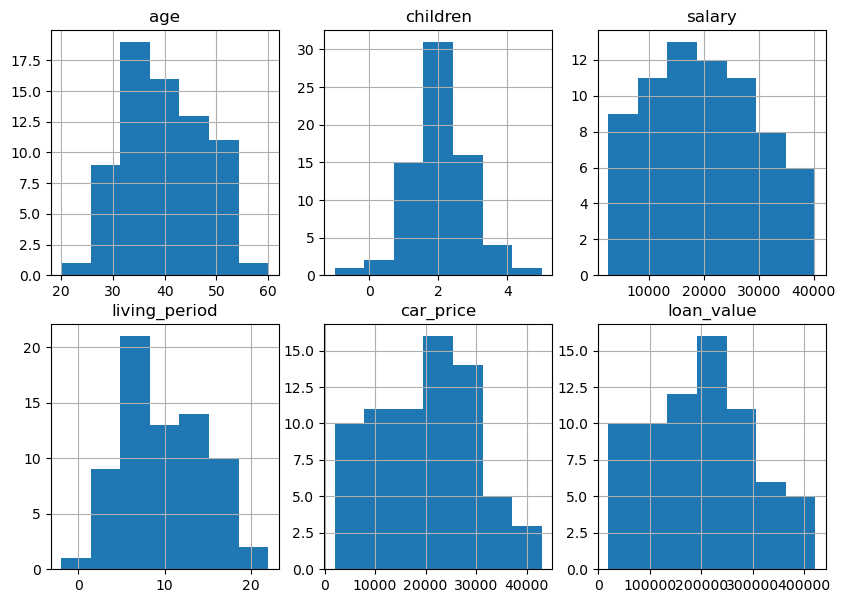

In [8]:
fig = plt.figure(figsize =(10, 7))
for i, column in enumerate(data.columns):
  plt.subplot(2, 3, i+1)
  plt.hist(data[column].dropna(), bins=7);
  plt.title(column)
  plt.grid()

Так как данных очень мало, то по гистограммам признаков сложно сказать, какое у них распределение. Можно было бы сделать предположение, что признаки "возраст" и "количество иждевенцев" имеют нормальное распределение.

Снижение размерности. Метод MDS

Возможность снижения размерности данных

Вычислим расстояния между клиентами как скалярное произведение строк нормированной матрицы data_norm.

In [9]:
dist = np.zeros((len(data_norm), len(data_norm)))
for i in range(len(data_norm)):
  for j in range(i, len(data_norm)):
    dist[i][j] = np.linalg.norm(data_norm.iloc[i] - data_norm.iloc[j])
    dist[j][i] = np.linalg.norm(data_norm.iloc[i] - data_norm.iloc[j])

In [10]:
dist

array([[0.        , 0.10378501, 0.25633936, ..., 0.16528418, 0.1766308 ,
        0.20513804],
       [0.10378501, 0.        , 0.16254752, ..., 0.1250261 , 0.16832143,
        0.24114782],
       [0.25633936, 0.16254752, 0.        , ..., 0.13832001, 0.19172921,
        0.29148308],
       ...,
       [0.16528418, 0.1250261 , 0.13832001, ..., 0.        , 0.05814151,
        0.15599535],
       [0.1766308 , 0.16832143, 0.19172921, ..., 0.05814151, 0.        ,
        0.10302956],
       [0.20513804, 0.24114782, 0.29148308, ..., 0.15599535, 0.10302956,
        0.        ]])

In [11]:
n=len(data_norm)
I=np.diag(np.ones(n))
U=np.ones((n,n))
gramm=-0.5*(I-U*(1/n))*np.square(dist)*(I-U*(1/n))
eig_gramm=sorted(np.linalg.eigvalsh(gramm), reverse=True)
print("Собственные числа матрицы грамма")
for i in range(1,len(eig_gramm)+1):
    print("{:6.6f}".format(eig_gramm[i-1]), end='\t')
    if(i%6==0): print()

Собственные числа матрицы грамма
0.000124	0.000083	0.000031	0.000002	0.000000	0.000000	
0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	
0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	
0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	
0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	
0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	
0.000000	0.000000	-0.000000	-0.000000	-0.000000	-0.000000	
-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	
-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	
-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	
-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	
-0.000000	-0.000000	-0.000000	-0.000240	

Как мы видим, ненулевые собственные значения не сильно отличаются друг от друга. Так как четвертое в несколько раз меньше первых трех собственных значений, можно предположить, что клиентов можно поместить в евклидовое пространство размерности 3 с сохранением расстояний. Сказать тоже самое про размещение в пространство размерности 2 сложнее, так как второе и третье отличаются чуть больше чем в 2,5 раза.

Использование алгоритма MDS

Для размещения клиентов в евклидовое пространство размерности 2 будем использовать итеративный процесс мажоризации стресса, а именно алгоритм SMACOF (англ. Scaling by MAjorizing a COmplicated Function)

In [12]:
from sklearn.manifold import MDS

In [13]:
mds = MDS(n_components=2, dissimilarity='precomputed')
Z_MDS_2 = mds.fit_transform(dist)

Получаем следующее размещение объектов:

In [14]:
pd.DataFrame(Z_MDS_2)

,0,1
0,0.029816,-0.091307
1,-0.067371,-0.051458
2,-0.166787,0.071706
3,-0.034582,-0.020557
4,-0.095663,-0.052148
...,...,...
65,-0.146503,-0.022993
66,0.145658,0.086482
67,-0.025028,0.065998
68,0.028192,0.088942


Погрешность размещения

Расcчитаем погрешность такого размещения

In [15]:
distances1 = np.zeros((len(data_norm), len(data_norm)))
for i in range(len(data_norm)):
  for j in range(i, len(data_norm)):
    distances1[i][j] = np.linalg.norm(Z_MDS_2[i] - Z_MDS_2[j])
    distances1[j][i] = np.linalg.norm(Z_MDS_2[i] - Z_MDS_2[j])
print(f"Стандартный стресс Краскаля: {np.square(dist - distances1).sum().sum()/np.square(dist).sum().sum()}")
print(f"MAE размещения: {np.abs(dist - distances1).mean()}")
print(f"MAPE размещения: {np.nanmean(np.abs(dist - distances1)/(dist+1e-10))}")
print(f"MSE размещения: {np.square(dist - distances1).mean()}")

Стандартный стресс Краскаля: 0.0002620446164729187
MAE размещения: 0.001747818827556446
MAPE размещения: 0.01998143353071995
MSE размещения: 7.667744532305916e-06


Полученное размещение имеет маленькую погрешность аппроксимациии

Карта клиентов

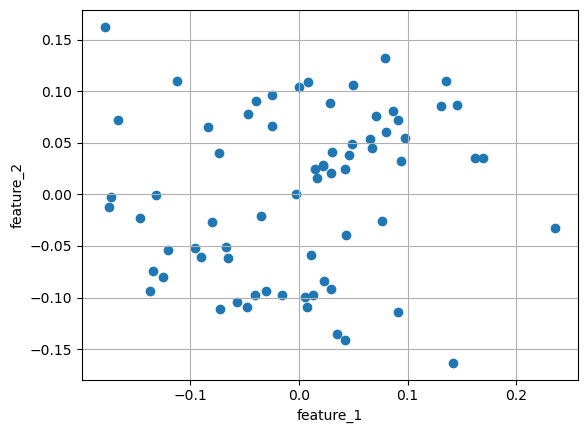

In [16]:
plt.scatter(pd.DataFrame(Z_MDS_2).iloc[:, 0], pd.DataFrame(Z_MDS_2).iloc[:, 1])
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.grid()

Можно заметить два кластера в верхней и нижней частях. Посмотрим, что покажет алгоритм кластеризации.

Кластеризация (distance and similarity, EM-алгоритм, оценка качества, RAND-индекс)

In [17]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, manhattan_distances, cosine_distances
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data2 = data.drop(data.columns[-3:], axis=1)

Считаем distance matrix и similarity matrix

In [19]:
distance_matrix_X = euclidean_distances(data2, data2)

In [20]:
distance_matrix_X

array([[    0.        ,  7300.00342466, 10100.02663363, ...,
         2200.0665899 ,  8600.01703487, 17900.00810056],
       [ 7300.00342466,     0.        ,  2800.04642819, ...,
         9500.00531579, 15900.0031761 , 25200.00198413],
       [10100.02663363,  2800.04642819,     0.        , ...,
        12300.00150406, 18700.0009893 , 28000.00071429],
       ...,
       [ 2200.0665899 ,  9500.00531579, 12300.00150406, ...,
            0.        ,  6400.        , 15700.00003185],
       [ 8600.01703487, 15900.0031761 , 18700.0009893 , ...,
         6400.        ,     0.        ,  9300.00005376],
       [17900.00810056, 25200.00198413, 28000.00071429, ...,
        15700.00003185,  9300.00005376,     0.        ]])

In [21]:
import math

def calculate_similarity(vec1, vec2, sigma=0.5):
    distance = np.linalg.norm(vec1 - vec2)
    return math.exp(-distance**2 / (2 * sigma))

def build_similarity_matrix(dataframe):

    size = dataframe.shape[0]
    similarity_matrix = np.zeros((size, size))


    for row_idx in range(size):
        for col_idx in range(size):
            similarity_matrix[row_idx, col_idx] = calculate_similarity(
                dataframe.iloc[row_idx, :], dataframe.iloc[col_idx, :]
            )


    return pd.DataFrame(similarity_matrix)

In [22]:
similarity_matrix_X = build_similarity_matrix(data2)

EM - алгоритм

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_norm = scaler_X.fit_transform(data2)

In [24]:
gmm_X = GaussianMixture(n_components=2, random_state=42).fit(X_norm)
clusters_X_em = gmm_X.predict(X_norm)

c:\Users\nicks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


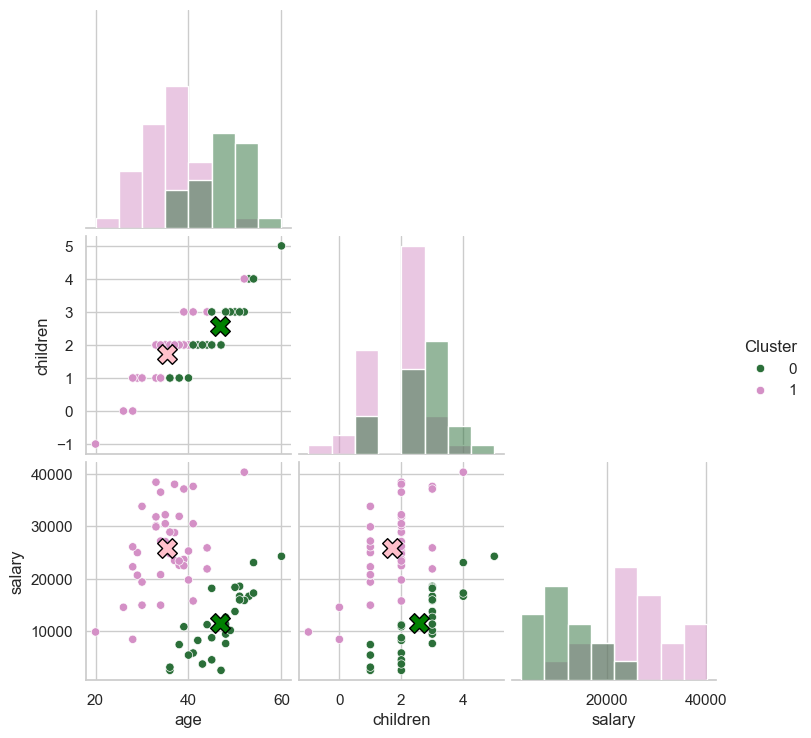

In [28]:
centers_X_em = scaler_X.inverse_transform(gmm_X.means_)
data2['Cluster'] = clusters_X_em

sns.set(style="whitegrid")
pairplot_X = sns.pairplot(data2, diag_kind="hist", hue="Cluster", palette="cubehelix", height=2.5, corner=True)

# Adjust index pairs based on actual feature count
pairs = [(0, 1), (0, 2), (1, 2)]  # Update this based on your data's features

for i, (x, y) in enumerate(pairs):
    ax = pairplot_X.axes[y][x]
    if x != y:
        for center, cluster_label in zip(centers_X_em, range(len(centers_X_em))):
            ax.scatter(
                center[x], center[y],
                s=200, c=['green', 'pink'][cluster_label], edgecolor='black', marker='X', label=f'Center {cluster_label+1}'
            )
